In [1]:
'''Assignment 2 - Task 2: Linear Regression with Pseudo-Inverse and Gradient Descent for the wdbc dataset
AIT-736, Instructor: Dr. Liao, Date: 10/3/2022
Khanh Nguyen, Anisha Mou, Rohan Jonnakuti, Vishveshwar Kondala

The code below using basic Python functions to build Linear Regression with Pseudo-Inverse and Gradient Descent from scratch 
to implement the basic classification for breast tumor: Malignant (1) and Benign (0).  
The first 75% examples are used for training and the remaining 25% for testing.
The training took 1000 iterations with Learning Rate is lr = 0.001
Set threshold to 0.5 to calculate the predicted y from the formula with pseudoinverse matrix weight:
y_pred = 0.0 if i <= 0.5 else 1.0 
The accuracy for train set obtained by pseudo-inverse:  0.9624413145539906
The accuracy for test set obtained by pseudo-inverse:  0.9788732394366197
The weight result is at the bottom
'''
import math
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from collections import Counter


#Changing path to working directory
working_directory = os.getcwd()
os.chdir(working_directory)
print(working_directory)

C:\Users\khanh\Desktop\GMUeducation\AIT736\Assignments\Assignment2\AIT736-Assignment2-Team4-Perceptron-and-Linear-Regression


In [2]:
df = pd.read_csv('wdbc1.csv')
vect_df = np.array(df )
print("Shape of Vectorized dataset:",vect_df.shape)
# print(vect_df[:4])

Shape of Vectorized dataset: (568, 32)


In [3]:
X = np.array(vect_df[:,1:-1]) #all data except last column
print("Shape of X", X.shape) 
print(X[:4])
y = np.array(vect_df[:,-1]) #only last column
print("\nShape of y:",y.shape)
print(y[:100])

Shape of X (568, 30)
[[20.57 17.77 132.9 1326.0 0.08474 0.07864 0.0869 0.07017 0.1812 0.05667
  0.5435 0.7339 3.398 74.08 0.005225 0.01308 0.0186 0.0134 0.01389
  0.003532 24.99 23.41 158.8 1956.0 0.1238 0.1866 0.2416 0.186 0.275
  0.08902]
 [19.69 21.25 130.0 1203.0 0.1096 0.1599 0.1974 0.1279 0.2069 0.05999
  0.7456 0.7869 4.585 94.03 0.00615 0.04006 0.03832 0.02058 0.0225
  0.004571 23.57 25.53 152.5 1709.0 0.1444 0.4245 0.4504 0.243 0.3613
  0.08758]
 [11.42 20.38 77.58 386.1 0.1425 0.2839 0.2414 0.1052 0.2597 0.09744
  0.4956 1.156 3.445 27.23 0.00911 0.07458 0.05661 0.01867 0.05963
  0.009208 14.91 26.5 98.87 567.7 0.2098 0.8663 0.6869 0.2575 0.6638
  0.173]
 [20.29 14.34 135.1 1297.0 0.1003 0.1328 0.198 0.1043 0.1809 0.05883
  0.7572 0.7813 5.438 94.44 0.01149 0.02461 0.05688 0.01885 0.01756
  0.005115 22.54 16.67 152.2 1575.0 0.1374 0.205 0.4 0.1625 0.2364
  0.07678]]

Shape of y: (568,)
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'B' 'B' 'B' 'M' '

In [4]:
# using NumPy function 'where' to convert M,B to 1,0
y = np.where(y=='M', 1, 0)
# y = np.array(y, dtype = float )
y[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [5]:
#Split the dataset base on percentage
s_f = 0.75
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 426
Total Number of rows in test: 142


## Linear regression Summary
First, get the data and separate it as X(features) and y(labels). weights and bias are vectors. 

initialize the parameters randomly as matrix or all zeros:

weights = np.zeros((n,1)) # n: number of features 

bias = 0

Calculate y_hat according to the formula of Linear regression: y = wX + b # with w: weights, b: bias

y_hat = np.dot(X, weights) + bias

The objective is to find weights and bias such that it minimizes the loss function.
Calculate gradients with respect to parameters (weights and bias )

dw = (1/m)np.dot(X.T, (y_hat - y)) # m: number of records, X: input matrix, y: labels/targets

db = (1/m)np.sum((y_hat - y))

Update the parameters weights and bias . #lr: learning rate

weights -= lr * dw 

bias -= lr * db

Repeat the above points. The number of times you repeat is also called epochs (or the number of iterations).

Set threshold to 0.5 to calculate the predicted y from the formula with pseudoinverse matrix weight:
y_pred = 0.0 if i <= 0.5 else 1.0 

In [6]:
# Linear Regression class
class LinReg:
    
    # Initializing lr: learning rate, epochs: no. of iterations, 
    # weights & bias: parameters as None
    # default lr: 0.01, epochs: 800
    def __init__(self, lr=0.01, epochs=800):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    # Training function: fit
    def fit(self, X, y):
        # shape of X: (number of training examples (rows): m, number of features (cols): n)
        m, n = X.shape    
    
        # Initializing weights as a matrix of zeros of size: (number
        # of features: n, 1) and bias as 0
        self.weights = np.zeros((n,1))
        self.bias = 0
        
        # reshaping y as (m,1) in case your dataset initialized as (m,) which can cause problems
        y = y.reshape(m,1)

        # Gradient Descent loop/ Training loop
        for epoch in range(self.epochs):
            self.weights = np.dot(np.linalg.pinv(X),y)
            # Calculating prediction: y_hat 
            y_hat = np.dot(X, self.weights) #+ self.bias

    
            # Calculating derivatives of parameters(weights and  bias) or w = np.dot(np.linalg.pinv(X),y)
            dw = (1/m)*np.dot(X.T, (y_hat - y))
            db = (1/m)*np.sum((y_hat - y))
            
           # Updating the parameters: parameter := parameter - lr*derivative
            # of loss/cost w.r.t parameter)
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
            
            
        #Set threshold to 0.5
        y_pred = [0.0 if i <= 0.5 else 1.0 for i in y_hat]
        print('Size of y_hat:', len(y_hat))
        # returning the parameter so we can look at them later
        return self.weights, self.bias, y_pred  #losses
    
    # Predicting(calculating y_hat with our updated weights) for the testing/validation     
    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        y_pred = [0.0 if i <= 0.5 else 1.0 for i in y_hat]
        return y_pred

In [7]:
%%time
X_train = np.matrix(X_train, dtype=float)
y_train = np.matrix(np.array(y_train, dtype=float))

model = LinReg(lr=0.001, epochs=1000)
weight, bias, y_pred = model.fit(X_train,y_train)


Size of y_hat: 426
Wall time: 1.57 s


In [8]:
print(weight.tolist())

[[-0.35454946059941445], [0.01677873940077064], [0.022073164751161778], [0.0014367117548522578], [1.3300950465187191], [-1.6012325353813206], [0.8083001159397312], [2.583729977494176], [-1.0446877324529544], [-17.943044138628654], [0.32114666692433885], [0.02575961115717494], [-0.008389190801248081], [-0.0011210943280573055], [13.324543398785138], [-2.737472805300025], [-3.3949390262453543], [10.991298569881526], [-0.3581045756695449], [12.416366838685763], [0.2331022876404908], [-0.0008902713836066362], [-0.003246580770642476], [-0.001254394326358414], [-0.31462536356150506], [0.10856865538615412], [0.4441604852373587], [0.8186376989086155], [0.8153939975076143], [4.026779694653127]]


In [9]:
print(np.matrix(y_pred, dtype=float))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
  1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
  0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
  0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
  0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
  0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
  0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
  1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 

In [10]:
print(y_train)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
  0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
  1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
  0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
  0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
  1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.
  0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 

In [11]:
# function to calculate the accuracy of the algorithm
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [12]:
y_true = np.squeeze(np.asarray(y_train))
# y_true = y_train.tolist()
y_true.shape

(426,)

In [13]:
accuracy(y_true, y_pred)

0.9624413145539906

In [14]:
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]


In [15]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0])

In [16]:
accuracy(y_test, y_test_pred)

0.9788732394366197

In [17]:
# Calculate Confusion Matrix without scikit-learn
def confusionmatrix(actual, predicted, normalize = False):

    unique = sorted(set(actual))
    matrix = [[0 for _ in unique] for _ in unique]
    imap   = {key: i for i, key in enumerate(unique)}
    # Generate Confusion Matrix
    for p, a in zip(predicted, actual):
        matrix[imap[p]][imap[a]] += 1
    # Matrix Normalization
    if normalize:
        sigma = sum([sum(matrix[imap[i]]) for i in unique])
        matrix = [row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
    return matrix

cm = confusionmatrix(y_test, y_test_pred)
print("Confusion matrix for test set")
for line in cm:
    print(line)

Confusion matrix for test set
[106, 2]
[1, 33]


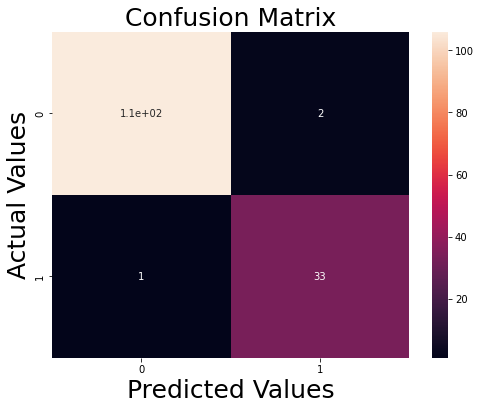

In [18]:
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix', size = 25)
plt.ylabel('Actual Values', size = 25)
plt.xlabel('Predicted Values', size = 25)
plt.show()

In [19]:
print('**** Linear Regression by computing pseudo-inverse')
print('The accuracy for train set obtained by pseudo-inverse: ', accuracy(y_true, y_pred))
print('The accuracy for test set obtained by pseudo-inverse: ', accuracy(y_test, y_test_pred))

weights = []
for w in weight.tolist():
    for i in w: 
        weights.append(i)

print('The weights (w =X`y) derived from the pseudo-inverse (X`): np.dot(np.linalg.pinv(X),y) \n', weights)

**** Linear Regression by computing pseudo-inverse
The accuracy for train set obtained by pseudo-inverse:  0.9624413145539906
The accuracy for test set obtained by pseudo-inverse:  0.9788732394366197
The weights (w =X`y) derived from the pseudo-inverse (X`): np.dot(np.linalg.pinv(X),y) 
 [-0.35454946059941445, 0.01677873940077064, 0.022073164751161778, 0.0014367117548522578, 1.3300950465187191, -1.6012325353813206, 0.8083001159397312, 2.583729977494176, -1.0446877324529544, -17.943044138628654, 0.32114666692433885, 0.02575961115717494, -0.008389190801248081, -0.0011210943280573055, 13.324543398785138, -2.737472805300025, -3.3949390262453543, 10.991298569881526, -0.3581045756695449, 12.416366838685763, 0.2331022876404908, -0.0008902713836066362, -0.003246580770642476, -0.001254394326358414, -0.31462536356150506, 0.10856865538615412, 0.4441604852373587, 0.8186376989086155, 0.8153939975076143, 4.026779694653127]


## REFERENCE
Verma, S. (2021). Linear Regression from scratch in Python. Medium. Retrieved on 10/3/2022 from https://medium.com/analytics-vidhya/linear-regression-from-scratch-in-python-b6501f91c82d